In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [127]:
# generate x1
x1 = np.random.uniform(1,10)
tau = 1

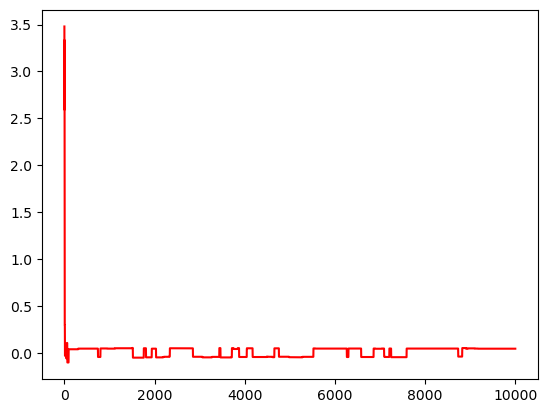

/var/folders/kv/8l0p5r5d33d2hlsl56hbmvxw0000gn/T/ipykernel_15869/3095874316.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = x, hist = False)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

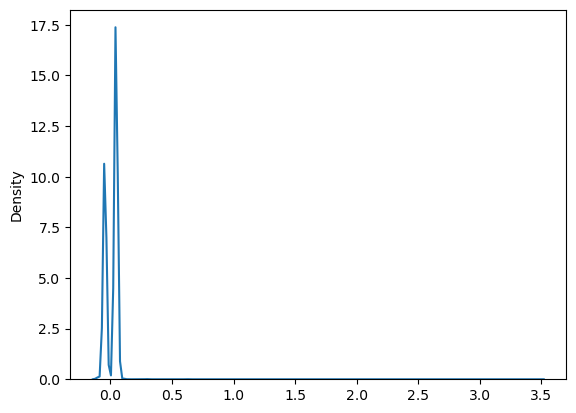

In [128]:
x = [x1]
for t in range(0, 10000):
    # generate yt from q(yt | xt_1)
    y = np.random.normal(x[t], tau)
    
    # calculate acceptance rate
    alpha = np.min((((-np.sin(100 * y) / y) + (np.sin(100 * x[t]) / x[t])),0))

    # generate u from uniform distribution
    u = np.log(np.random.uniform(0, 1))

    # u < alpha
    if u < alpha:
        xt = y
        x.append(xt)
    # otherwise
    else:
        xt = x[t]
        x.append(xt)
        
plt.plot(x, 'r')
plt.show()

sns.distplot(a = x, hist = False)

In [129]:
def target(x):
    return np.exp(-np.sin(100 * x) / x)

(0.0, 10.0)

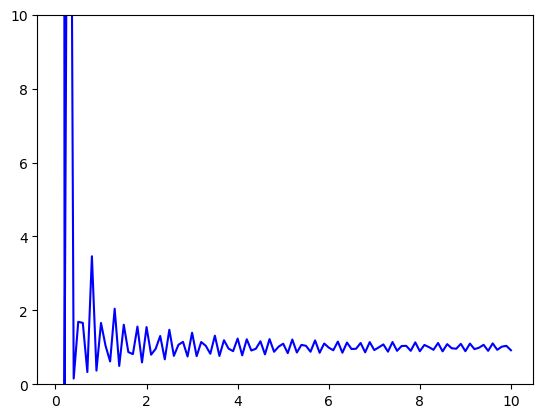

In [130]:
x_target = np.linspace(0.1, 10, 100)
y_target = target(x_target)

plt.plot(x_target, y_target, 'b')
plt.ylim((0,10))

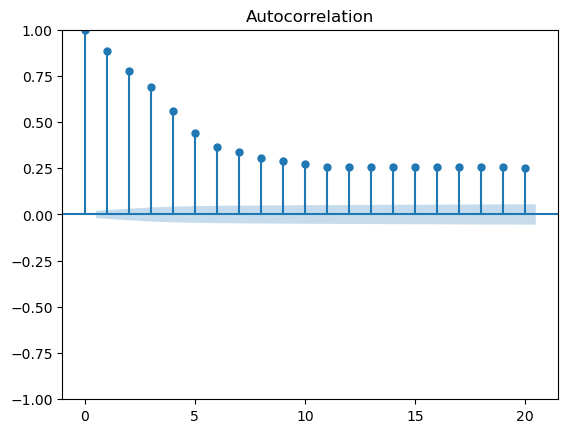

In [131]:
plot_acf(np.array(x), lags = 20)
plt.show()